# Hi! Thank you again for been here, for this case we are working with shopping data and we are going to look for patrons in shopping to promote real life problem solution like promotions and customer categorization. Hope that you like it!

In [ ]:
"C:/Users/Alejandro/Downloads/git.kaggle/archive (1)/Pakistan Largest Ecommerce Dataset.csv"

In [2]:
import pandas as pd

# Example: Creating a sample DataFrame to mimic loading data
data = pd.read_csv("C:/Users/Alejandro/Downloads/git.kaggle/archive (1)/Pakistan Largest Ecommerce Dataset.csv")

# Count rows and columns
rows, columns = data.shape

# Count unique classes in columns with string values
string_columns = data.select_dtypes(include=['object'])
unique_classes = {col: string_columns[col].nunique() for col in string_columns.columns}

rows, columns, unique_classes


c:\Users\Alejandro\OneDrive\Attachments\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1048575,
 26,
 {'status': 16,
  'created_at': 789,
  'sku': 84889,
  'increment_id': 408785,
  'category_name_1': 16,
  'sales_commission_code': 7226,
  'payment_method': 18,
  'Working Date': 789,
  'BI Status': 4,
  ' MV ': 9720,
  'Customer Since': 26,
  'M-Y': 26,
  'FY': 3})

We search in time what are the average sells made by this e-commerce company to see how we can help categorize customers in some ways to promote business development.

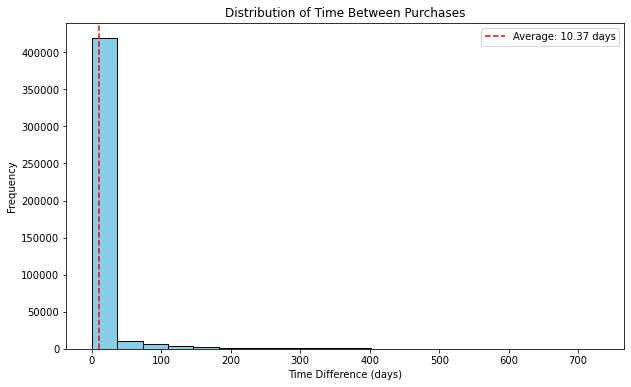

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Working Date' to datetime format
data['Working Date'] = pd.to_datetime(data['Working Date'])

# Sort data by 'Customer ID' and 'Working Date'
data = data.sort_values(by=['Customer ID', 'Working Date'])

# Calculate time difference between consecutive purchases for each customer
data['Time Difference'] = data.groupby('Customer ID')['Working Date'].diff().dt.days

# Filter customers with at least 3 purchases
customer_counts = data['Customer ID'].value_counts()
valid_customers = customer_counts[customer_counts >= 3].index
filtered_data = data[data['Customer ID'].isin(valid_customers)]

# Calculate the average time gap for the filtered customers
average_time_gap = filtered_data['Time Difference'].mean()

# Plot the distribution of time differences
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Time Difference'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_time_gap, color='red', linestyle='--', label=f'Average: {average_time_gap:.2f} days')
plt.title('Distribution of Time Between Purchases')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

average_time_gap

<ipython-input-5-91085ccd2601>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Category'] = filtered_data['Time Difference'].apply(categorize_customer)


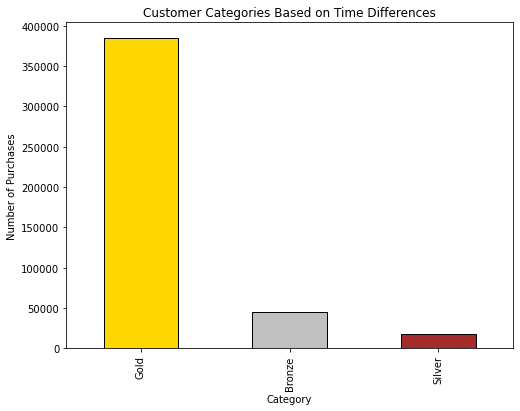

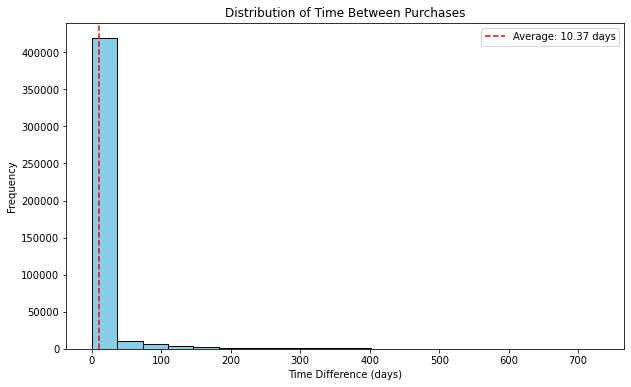

10.36776881624496

In [5]:
# Convert 'Working Date' to datetime format
data['Working Date'] = pd.to_datetime(data['Working Date'])

# Sort data by 'Customer ID' and 'Working Date'
data = data.sort_values(by=['Customer ID', 'Working Date'])

# Calculate time difference between consecutive purchases for each customer
data['Time Difference'] = data.groupby('Customer ID')['Working Date'].diff().dt.days

# Filter customers with at least 3 purchases
customer_counts = data['Customer ID'].value_counts()
valid_customers = customer_counts[customer_counts >= 3].index
filtered_data = data[data['Customer ID'].isin(valid_customers)]

# Categorize customers based on time differences
def categorize_customer(days):
    if pd.isna(days):
        return None
    elif days < 7:
        return 'Gold'
    elif days <= 14:
        return 'Silver'
    else:
        return 'Bronze'

filtered_data['Category'] = filtered_data['Time Difference'].apply(categorize_customer)

# Plot the distribution of categories
category_counts = filtered_data['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['gold', 'silver', 'brown'], edgecolor='black')
plt.title('Customer Categories Based on Time Differences')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

# Calculate the average time gap for the filtered customers
average_time_gap = filtered_data['Time Difference'].mean()

# Plot the distribution of time differences
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Time Difference'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_time_gap, color='red', linestyle='--', label=f'Average: {average_time_gap:.2f} days')
plt.title('Distribution of Time Between Purchases')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output the average time gap for reference
average_time_gap



<ipython-input-16-9ae4a86f6b49>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Category'] = filtered_data['Time Difference'].apply(categorize_customer)


Customer counts by category:
Category
Bronze    20548
Gold      43112
Silver     9860
Name: Customer ID, dtype: int64


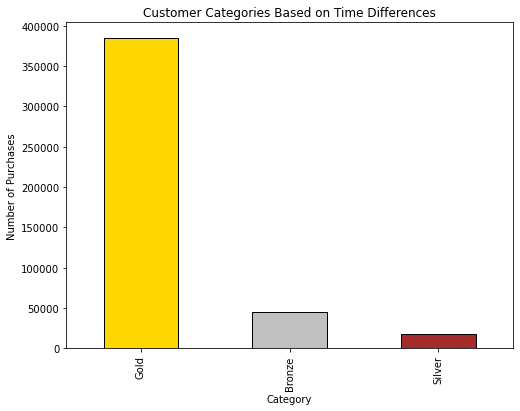

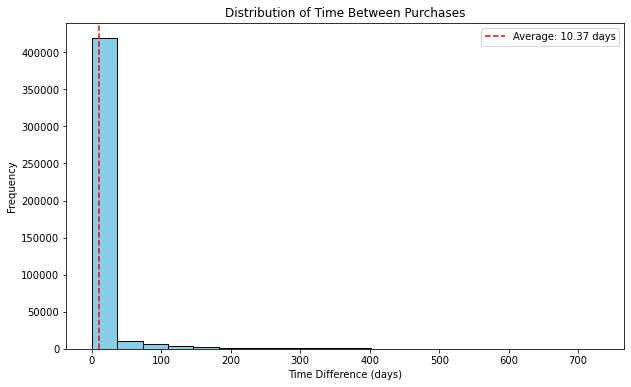

10.36776881624496

In [16]:
# Convert 'Working Date' to datetime format
data['Working Date'] = pd.to_datetime(data['Working Date'])

# Sort data by 'Customer ID' and 'Working Date'
data = data.sort_values(by=['Customer ID', 'Working Date'])

# Calculate time difference between consecutive purchases for each customer
data['Time Difference'] = data.groupby('Customer ID')['Working Date'].diff().dt.days

# Filter customers with at least 3 purchases
customer_counts = data['Customer ID'].value_counts()
valid_customers = customer_counts[customer_counts >= 3].index
filtered_data = data[data['Customer ID'].isin(valid_customers)]

# Categorize customers based on time differences
def categorize_customer(days):
    if pd.isna(days):
        return None
    elif days < 7:
        return 'Gold'
    elif days <= 14:
        return 'Silver'
    else:
        return 'Bronze'
    
filtered_data['Category'] = filtered_data['Time Difference'].apply(categorize_customer)

# Count the number of Customer IDs for each category
customer_category_counts = filtered_data.groupby('Category')['Customer ID'].nunique()
print("Customer counts by category:")
print(customer_category_counts)

# Plot the distribution of categories
category_counts = filtered_data['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['gold', 'silver', 'brown'], edgecolor='black')
plt.title('Customer Categories Based on Time Differences')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

# Calculate the average time gap for the filtered customers
average_time_gap = filtered_data['Time Difference'].mean()

# Plot the distribution of time differences
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Time Difference'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_time_gap, color='red', linestyle='--', label=f'Average: {average_time_gap:.2f} days')
plt.title('Distribution of Time Between Purchases')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output the average time gap for reference
average_time_gap

#We have our big first finding were it shows that half of our Customers from the biggest group (Gold = 43.112) are in the Bronze (20.548) group, which means a campaign to convince them into gold or silver (9860) could certainly promote business growth for this e-commerce.

Following we are going to look for patterns (pattern mining). There are 16 different shopping categories in our dataset, we are going to look for those customers that purchased in more than 4 categories (+25% of options) in a 6 months window, to cluster them as "PLATINUM" customers. This will help departments take deicsions to include Platinum customres for promotions, information and different strategies and engagement for the customers encouraging brand positioning.

Platinum Customer IDs with 4+ categories in a 6-month window: [4.0, 13.0, 15.0, 16.0, 19.0, 20.0, 21.0, 23.0, 28.0, 32.0, 33.0, 35.0, 36.0, 38.0, 42.0, 43.0, 44.0, 47.0, 48.0, 54.0, 55.0, 56.0, 58.0, 59.0, 61.0, 63.0, 64.0, 66.0, 70.0, 71.0, 73.0, 75.0, 79.0, 81.0, 82.0, 83.0, 85.0, 86.0, 91.0, 94.0, 96.0, 98.0, 101.0, 102.0, 106.0, 111.0, 114.0, 123.0, 126.0, 130.0, 132.0, 137.0, 141.0, 143.0, 144.0, 148.0, 163.0, 168.0, 172.0, 174.0, 178.0, 180.0, 189.0, 191.0, 199.0, 210.0, 217.0, 219.0, 220.0, 222.0, 225.0, 228.0, 230.0, 236.0, 237.0, 238.0, 240.0, 241.0, 243.0, 247.0, 248.0, 251.0, 252.0, 253.0, 256.0, 257.0, 258.0, 260.0, 261.0, 262.0, 265.0, 267.0, 282.0, 292.0, 294.0, 299.0, 321.0, 323.0, 327.0, 329.0, 334.0, 353.0, 364.0, 366.0, 371.0, 380.0, 382.0, 395.0, 396.0, 407.0, 408.0, 412.0, 415.0, 420.0, 423.0, 425.0, 432.0, 433.0, 441.0, 448.0, 451.0, 456.0, 458.0, 459.0, 464.0, 468.0, 473.0, 478.0, 479.0, 485.0, 492.0, 500.0, 514.0, 533.0, 536.0, 537.0, 553.0, 555.0, 556.0, 559.0, 

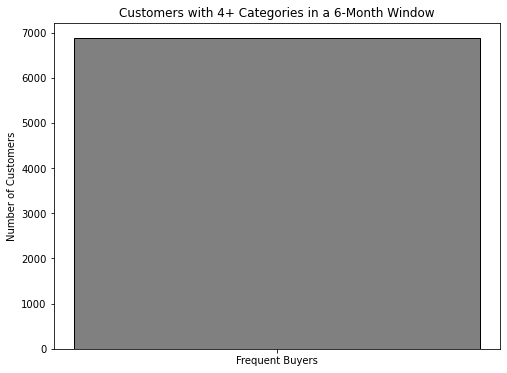

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Working Date' to datetime format
data['Working Date'] = pd.to_datetime(data['Working Date'])

# Sort data by 'Customer ID' and 'Working Date'
data = data.sort_values(by=['Customer ID', 'Working Date'])

# Identify customers with at least 4 categories in a 6-month window
def find_frequent_categories(data):
    results = []

    for customer_id, group in data.groupby('Customer ID'):
        group = group.sort_values(by='Working Date')
        categories_in_window = set()
        start_date = None

        # Sliding window approach
        for i, row in group.iterrows():
            if start_date is None:
                start_date = row['Working Date']

            # Check if within 6 months
            if (row['Working Date'] - start_date).days <= 183:  # 6 months
                categories_in_window.add(row['category_name_1'])
            else:
                # Reset window
                start_date = row['Working Date']
                categories_in_window = {row['category_name_1']}

            # Check threshold
            if len(categories_in_window) >= 4:
                results.append(customer_id)
                break
    return results

frequent_customers = find_frequent_categories(data)

# Output the Customer IDs that meet the criteria
print("Platinum Customer IDs with 4+ categories in a 6-month window:", frequent_customers)

# Count the number of customers meeting the criteria
frequent_customer_count = len(frequent_customers)
print("Number of customers with 4+ categories in a 6-month window:", frequent_customer_count)

# Visualizing the number of customers meeting the criteria
plt.figure(figsize=(8, 6))
plt.bar(['Frequent Buyers'], [frequent_customer_count], color='gray', edgecolor='black')  # Corrected color
plt.title('Customers with 4+ Categories in a 6-Month Window')
plt.ylabel('Number of Customers')
plt.show()

